In [1]:
import matplotlib.pyplot as plt
from train_valid_test_loader import load_train_valid_test_datasets
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
import numpy as np

epoch       0.000 | loss_total     1.50194 | train_AUC    0.50235 | train_MAE    1.00276 | valid_AUC     0.50524 | valid_MAE     1.00816 | grad_wrt_mu     0.93399 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.014 | loss_total     1.40489 | train_AUC    0.57967 | train_MAE    0.99220 | valid_AUC     0.57694 | valid_MAE     0.99670 | grad_wrt_mu     0.84034 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00097 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.029 | loss_total     1.32961 | train_AUC    0.62367 | train_MAE    0.98281 | valid_AUC     0.62285 | valid_MAE     0.98649 | grad_wrt_mu     0.66191 | grad_wrt_b_per_user     0.00154 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch       0.043 | loss_total     1.41559 | train_AUC    0.64691 | train_MAE    0.97539 | valid_AUC     0.64333 | valid_MAE     0.97844 | grad_wrt_mu     0.

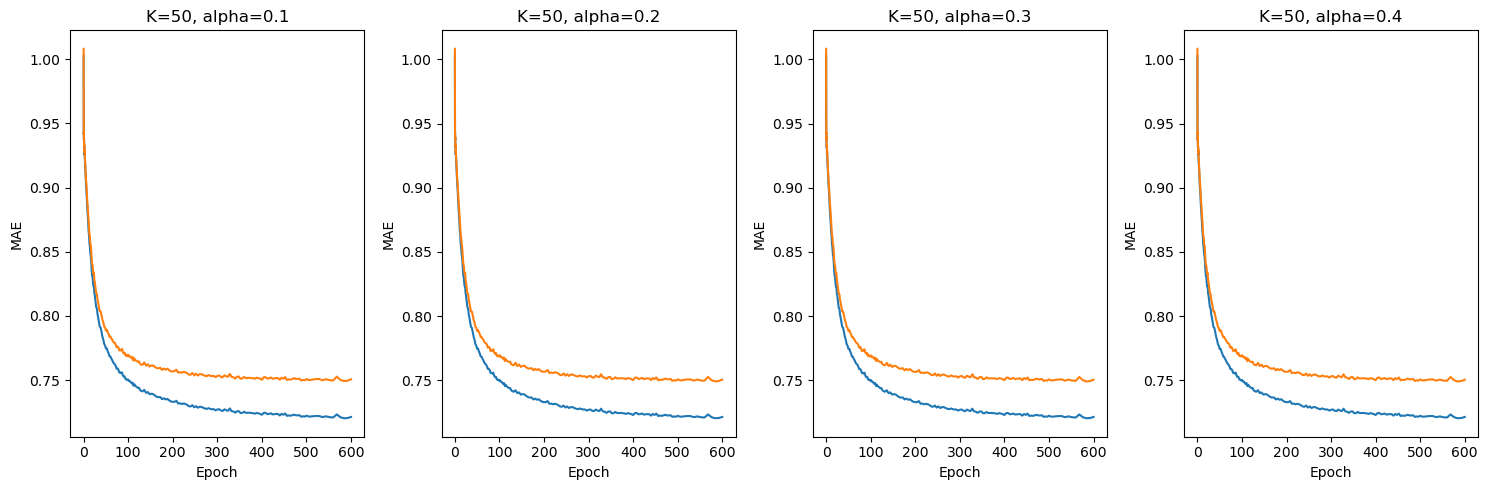

In [11]:

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = [0.1, 0.2, 0.3, 0.4]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))

for i, alpha in enumerate(alphas):
    # Create the model and initialize its parameters
    model = CollabFilterOneVectorPerItem(
        n_epochs=600, batch_size=1000, step_size=0.1, n_factors=2, alpha=alpha
    )
    model.init_parameter_dict(n_users, n_items, train_tuple)
    
    # Fit the model with SGD
    model.fit(train_tuple, valid_tuple)
    
    # Plot the MAE trace
    axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
    axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('MAE')
    axs[i].set_title(f'K=50, alpha={alpha}')

plt.tight_layout()
plt.show()

epoch       0.000 | loss_total     1.37507 | train_AUC    0.50269 | train_MAE    1.00264 | valid_AUC     0.49616 | valid_MAE     1.00803 | grad_wrt_mu     0.25007 | grad_wrt_b_per_user     0.00212 | grad_wrt_c_per_item     0.00119 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.000 | loss_total     1.34414 | train_AUC    0.50717 | train_MAE    0.99689 | valid_AUC     0.50111 | valid_MAE     1.00177 | grad_wrt_mu     1.08438 | grad_wrt_b_per_user     0.00202 | grad_wrt_c_per_item     0.00113 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.44370 | train_AUC    0.51510 | train_MAE    0.97279 | valid_AUC     0.51694 | valid_MAE     0.97556 | grad_wrt_mu     0.52100 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00124 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch       0.001 | loss_total     1.15579 | train_AUC    0.53693 | train_MAE    0.96094 | valid_AUC     0.53457 | valid_MAE     0.96278 | grad_wrt_mu     0.

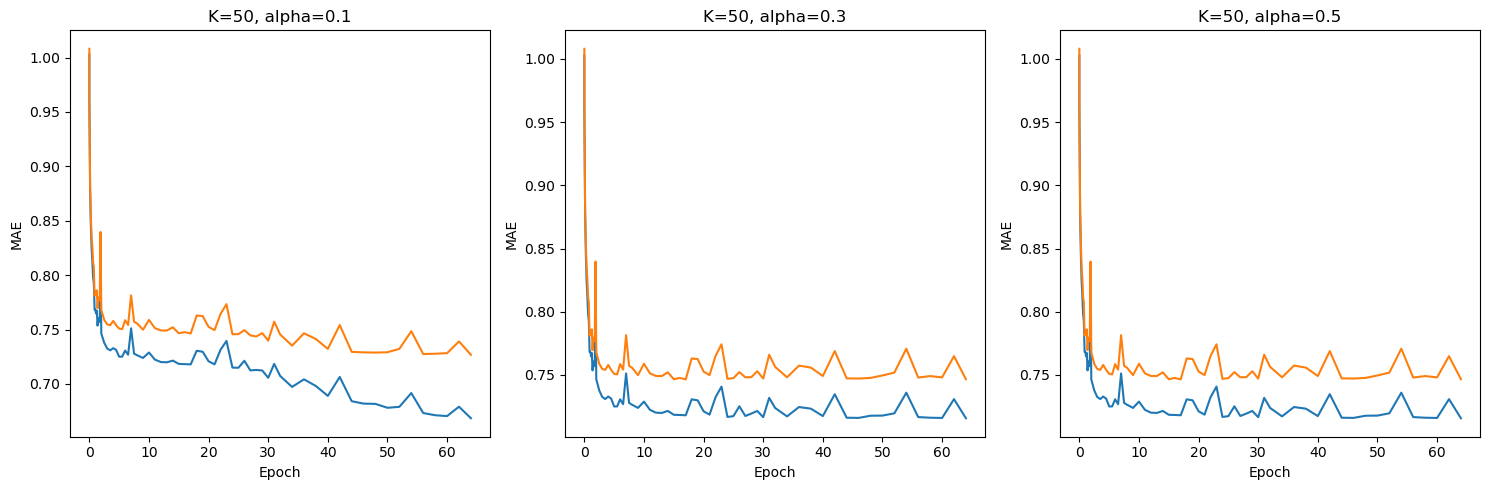

In [ ]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

# Set the number of factors to try
alphas = [0.001, 0.01, 0.1]

# Create subplots for the trace plots
fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5))

model = CollabFilterOneVectorPerItem(
    n_epochs=64, batch_size=32, step_size=0.1, n_factors=2, alpha=alpha
)
model.init_parameter_dict(n_users, n_items, train_tuple)
    
# Fit the model with SGD
model.fit(train_tuple, valid_tuple)
    
# Plot the MAE trace
axs[i].plot(model.trace_epoch, model.trace_mae_train, label='Training')
axs[i].plot(model.trace_epoch, model.trace_mae_valid, label='Validation')
axs[i].set_xlabel('Epoch')
axs[i].set_ylabel('MAE')
axs[i].set_title(f'K=50, alpha={alpha}')

plt.tight_layout()
plt.show()